## Packages

In [374]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

from xgboost import plot_importance
import xgboost as xgb

# Data Setup

In [307]:
# Read data
trainFileName = 'train_ScotiaDSD.csv'
testFileName = 'test_ScotiaDSD.csv'
data = pd.read_csv(os.path.join(os.getcwd(), trainFileName))
evalData = pd.read_csv(os.path.join(os.getcwd(), testFileName))

In [308]:
# BINARY_COLUMNS (not including FRAUD_FLAG), STRING_COLUMNS, NUMERICAL_COLUMNS
BINARY_COLUMNS = [
 'CARD_NOT_PRESENT',
 'FLAG_LX',
 'FLAG_ATM',
 'FLAG_AUTO',
 'FLAG_CASH',
 'FLAG_LS',
 'FLAG_DISCOUNT',
 'FLAG_RECREA',
 'FLAG_ELCTRNCS',
 'FLAG_REG_AMT',
 'FLAG_FASTFOOD',
 'FLAG_GAS',
 'FLAG_HIGH_AMT',
 'FLAG_HIGH_RECREA',
 'FLAG_INTERNET',
 'FLAG_INTERNATIONAL',
 'FLAG_JEWELRY',
 'FLAG_LOW_AMT',
 'FLAG_MANUAL_ENTRY',
 'FLAG_PHONE_ORDER',
 'FLAG_PURCHASE_EXCLUDING_GAS',
 'FLAG_PLANNED',
 'FLAG_RISKY',
 'FLAG_SWIPE',
 'FLAG_TRAVEL_ONLY',
 'FLAG_TRAVEL_AND_ENTERTAINMENT',
 'FLAG_WEEKEND']

STRING_COLUMNS = ['TRANSACTION_ID',
'USER_AGENT',
'CITY',
'EVENT_TIME']

NUMERICAL_COLUMNS = ['EVENT_MONTH',
 'EVENT_DAY_OF_WEEK',
 'AVAIL_CRDT',
 'AMOUNT',
 'CREDIT_LIMIT',
 'MEAN_AUTO_PAST_7DAY',
 'MEAN_LS_PAST_7DAY',
 'MEAN_RECREA_PAST_7DAY',
 'MEAN_REG_AMT_PAST_7DAY',
 'MEAN_FASTFOOD_PAST_7DAY',
 'MEAN_HIGH_AMT_PAST_7DAY',
 'MEAN_HIGH_RECREA_PAST_7DAY',
 'MEAN_INTERNET_PAST_7DAY',
 'MEAN_INTERNATIONAL_PAST_7DAY',
 'MEAN_JEWELRY_PAST_7DAY',
 'MEAN_LOW_AMT_PAST_7DAY',
 'MEAN_MANUAL_ENTRY_PAST_7DAY',
 'MEAN_PHONE_ORDER_PAST_7DAY',
 'MEAN_PLANNED_PAST_7DAY',
 'MEAN_SWIPE_PAST_7DAY',
 'MEAN_TRAVEL_AND_ENTERTAINMENT_PAST_7DAY',
 'MEAN_WEEKEND_PAST_7DAY',
 'MAX_CASH_PAST_7DAY',
 'MAX_LS_PAST_7DAY',
 'MAX_RECREA_PAST_7DAY',
 'MAX_HIGH_AMT_PAST_7DAY',
 'MAX_HIGH_RECREA_PAST_7DAY',
 'MAX_INTERNET_PAST_7DAY',
 'MAX_PHONE_ORDER_PAST_7DAY',
 'MAX_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
 'MAX_SWIPE_PAST_7DAY',
 'MAX_WEEKEND_PAST_7DAY',
 'STD_LX_PAST_7DAY',
 'STD_FASTFOOD_PAST_7DAY',
 'STD_HIGH_AMT_PAST_7DAY',
 'STD_INTERNET_PAST_7DAY',
 'STD_LOW_AMT_PAST_7DAY',
 'STD_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
 'STD_SWIPE_PAST_7DAY',
 'STD_TRAVEL_AND_ENTERTAINMENT_PAST_7DAY',
 'SUM_LX_PAST_7DAY',
 'SUM_AUTO_PAST_7DAY',
 'SUM_LS_PAST_7DAY',
 'SUM_RECREA_PAST_7DAY',
 'SUM_GAS_PAST_7DAY',
 'SUM_HIGH_AMT_PAST_7DAY',
 'SUM_INTERNET_PAST_7DAY',
 'SUM_INTERNATIONAL_PAST_7DAY',
 'SUM_LOW_AMT_PAST_7DAY',
 'SUM_MANUAL_ENTRY_PAST_7DAY',
 'SUM_PHONE_ORDER_PAST_7DAY',
 'SUM_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
 'SUM_PARTIAL_PAST_7DAY',
 'SUM_PLANNED_PAST_7DAY',
 'SUM_SWIPE_PAST_7DAY',
 'SUM_WEEKEND_PAST_7DAY',
 'COUNT_AUTO_PAST_7DAY',
 'COUNT_ELCTRNCS_PAST_7DAY',
 'COUNT_GAS_PAST_7DAY',
 'COUNT_HIGH_AMT_PAST_7DAY',
 'COUNT_INTERNET_PAST_7DAY',
 'COUNT_LOW_AMT_PAST_7DAY',
 'COUNT_MANUAL_ENTRY_PAST_7DAY',
 'COUNT_PHONE_ORDER_PAST_7DAY',
 'COUNT_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
 'COUNT_SWIPE_PAST_7DAY',
 'COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_7DAY',
 'COUNT_WEEKEND_PAST_7DAY',
 'MEAN_AUTO_PAST_30DAY',
 'MEAN_DISCOUNT_PAST_30DAY',
 'MEAN_RECREA_PAST_30DAY',
 'MEAN_ELCTRNCS_PAST_30DAY',
 'MEAN_REG_AMT_PAST_30DAY',
 'MEAN_HIGH_AMT_PAST_30DAY',
 'MEAN_INTERNET_PAST_30DAY',
 'MEAN_LOW_AMT_PAST_30DAY',
 'MEAN_MANUAL_ENTRY_PAST_30DAY',
 'MEAN_PHONE_ORDER_PAST_30DAY',
 'MEAN_PURCHASE_EXCLUDING_GAS_PAST_30DAY',
 'MEAN_PLANNED_PAST_30DAY',
 'MEAN_SWIPE_PAST_30DAY',
 'MEAN_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY',
 'MEAN_WEEKEND_PAST_30DAY',
 'MAX_AUTO_PAST_30DAY',
 'MAX_LS_PAST_30DAY',
 'MAX_ELCTRNCS_PAST_30DAY',
 'MAX_FASTFOOD_PAST_30DAY',
 'MAX_HIGH_RECREA_PAST_30DAY',
 'MAX_MANUAL_ENTRY_PAST_30DAY',
 'MAX_PHONE_ORDER_PAST_30DAY',
 'MAX_PARTIAL_PAST_30DAY',
 'MAX_RISKY_PAST_30DAY',
 'MAX_WEEKEND_PAST_30DAY',
 'STD_AUTO_PAST_30DAY',
 'STD_LS_PAST_30DAY',
 'STD_RECREA_PAST_30DAY',
 'STD_ELCTRNCS_PAST_30DAY',
 'STD_REG_AMT_PAST_30DAY',
 'STD_HIGH_RECREA_PAST_30DAY',
 'STD_INTERNET_PAST_30DAY',
 'STD_LOW_AMT_PAST_30DAY',
 'STD_MANUAL_ENTRY_PAST_30DAY',
 'STD_PHONE_ORDER_PAST_30DAY',
 'STD_PARTIAL_PAST_30DAY',
 'STD_SWIPE_PAST_30DAY',
 'STD_TRAVEL_ONLY_PAST_30DAY',
 'STD_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY',
 'SUM_AUTO_PAST_30DAY',
 'SUM_LS_PAST_30DAY',
 'SUM_DISCOUNT_PAST_30DAY',
 'SUM_RECREA_PAST_30DAY',
 'SUM_ELCTRNCS_PAST_30DAY',
 'SUM_REG_AMT_PAST_30DAY',
 'SUM_FASTFOOD_PAST_30DAY',
 'SUM_GAS_PAST_30DAY',
 'SUM_HIGH_AMT_PAST_30DAY',
 'SUM_HIGH_RECREA_PAST_30DAY',
 'SUM_INTERNET_PAST_30DAY',
 'SUM_INTERNATIONAL_PAST_30DAY',
 'SUM_LOW_AMT_PAST_30DAY',
 'SUM_MANUAL_ENTRY_PAST_30DAY',
 'SUM_PHONE_ORDER_PAST_30DAY',
 'SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY',
 'SUM_SWIPE_PAST_30DAY',
 'SUM_TRAVEL_ONLY_PAST_30DAY',
 'SUM_WEEKEND_PAST_30DAY',
 'COUNT_AUTO_PAST_30DAY',
 'COUNT_RECREA_PAST_30DAY',
 'COUNT_REG_AMT_PAST_30DAY',
 'COUNT_FASTFOOD_PAST_30DAY',
 'COUNT_GAS_PAST_30DAY',
 'COUNT_HIGH_AMT_PAST_30DAY',
 'COUNT_INTERNET_PAST_30DAY',
 'COUNT_LOW_AMT_PAST_30DAY',
 'COUNT_MANUAL_ENTRY_PAST_30DAY',
 'COUNT_PHONE_ORDER_PAST_30DAY',
 'COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY',
 'COUNT_PLANNED_PAST_30DAY',
 'COUNT_SWIPE_PAST_30DAY',
 'COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY',
 'COUNT_WEEKEND_PAST_30DAY',
 'PREV_M_INFLATION',
 'PREV_M_UNEMP_RATE']

# Data Analysis

### Takeaway
After having a deep-dive into the dataset, the follwoing conclusions can be made:
- there are three distinct data types:
    - float (numerical)
    - int (binary)
    - object (string)
- the magnitude of the variables differ greatly
- imbalance of target data (97.5% to 2.5%)

# Data Pre-processing

In [309]:
def data_preprocessing(dataframe, epsilon=0.001):
    """ Pre-process the data.
            - convert dtypes
            - change units to something more useful

    Args:
        data (DataFrame): pandas DataFrame

    Returns:
        DataFrame: same pandas Dataframe but preprocessed
    """
    # Convert binary variables into integers
    
    nonBinaryColumnNamesList = []
    for columnName in dataframe:
        # Binary variables only have 2 unique values
        if len(dataframe[columnName].unique()) == 2:
            dataframe[columnName] = dataframe[columnName].astype('int64')
        elif (dataframe[columnName].dtype == 'int64') or (dataframe[columnName].dtype == 'float64'):
            dataframe[columnName] = dataframe[columnName].astype('float64')
    
    # Convert EVENT_TIME string into seconds to be useful
    dataframe['EVENT_TIME'] = dataframe['EVENT_TIME'].apply(lambda x: x[:-1] if x[-1] == ':' else x)
    dateTransactionTime = pd.DataFrame(dataframe['EVENT_TIME'].str.split(r':').to_list(), columns=['hour', 'minutes'])
    dateTransactionTime = dateTransactionTime.astype('float64')

    dataTransactionTimeSeconds = dateTransactionTime['hour'] * 60 * 60 + dateTransactionTime['minutes'] * 60
    
    # Drop the useless columns now
    #dataframe = dataframe.fillna(" ")
    dataframe = dataframe.drop(STRING_COLUMNS, axis = 1)
    dataframe['EVENT_TIME_IN_SECONDS'] = dataTransactionTimeSeconds
    
    return dataframe

In [310]:
dataPreprocessed = data_preprocessing(data)
NUMERICAL_COLUMNS.append('EVENT_TIME_IN_SECONDS')

# Data Processing

In [311]:
y = dataPreprocessed['FRAUD_FLAG']
X = dataPreprocessed.drop(['FRAUD_FLAG'], axis = 1)

# Feature Engineering

In [312]:
X["FLAG_INTERNATIONAL_INTERNET"] = [int(x) for x in (X["FLAG_INTERNATIONAL"]==1) & (X["FLAG_INTERNET"]==1)]

In [313]:
X["FLAG_PAST_INTERNATIONAL_PURCHASE"] = [int(x) for x in (X["FLAG_INTERNATIONAL_INTERNET"]==1) & (X["MEAN_INTERNATIONAL_PAST_7DAY"]>0)]


In [362]:
X["CRDT_TO_AMOUNT"] = X['AVAIL_CRDT'] / X['AMOUNT']
X["AMOUNT_TO_LIMIT"] = X['AMOUNT'] / (X['CREDIT_LIMIT']+1)

In [363]:
np.average(X["AMOUNT_TO_LIMIT"])

0.019707294201141562

# Feature Selection

In [370]:
# Apply RF on a subset of data for efficiency
xRF, xTestRF, yRF, yTestRF = train_test_split(X, y, train_size=0.8, stratify=y, random_state=0)

In [372]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(xRF, yRF)

RandomForestClassifier(max_depth=7)

In [365]:
# Greatest to least
sort = (-rf.feature_importances_).argsort()
featureImportanceColumns = X.columns[sort]
featureImportanceValues = rf.feature_importances_[sort]

Text(0.5, 0, 'Feature Importance')

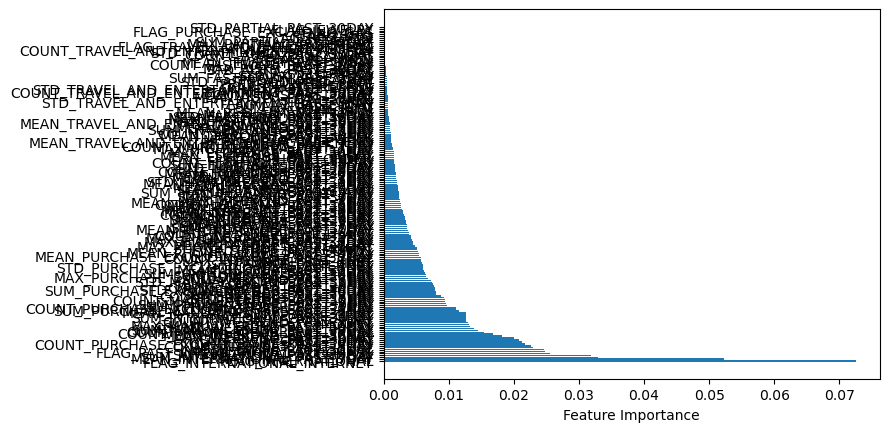

In [366]:
plt.barh(featureImportanceColumns, featureImportanceValues)
plt.xlabel("Feature Importance")

In [367]:
featureImportanceThreshold = 0.01

keepColumns = featureImportanceColumns[featureImportanceValues >= featureImportanceThreshold]

xImportantColumns = X[keepColumns]

In [368]:
keepColumns

Index(['FLAG_INTERNATIONAL_INTERNET', 'FLAG_INTERNATIONAL',
       'MEAN_INTERNATIONAL_PAST_7DAY', 'SUM_INTERNATIONAL_PAST_7DAY',
       'SUM_WEEKEND_PAST_30DAY', 'FLAG_PAST_INTERNATIONAL_PURCHASE',
       'MEAN_SWIPE_PAST_30DAY', 'STD_SWIPE_PAST_30DAY',
       'COUNT_INTERNET_PAST_7DAY', 'COUNT_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
       'COUNT_SWIPE_PAST_30DAY', 'CREDIT_LIMIT', 'SUM_SWIPE_PAST_30DAY',
       'MAX_WEEKEND_PAST_30DAY', 'MEAN_WEEKEND_PAST_30DAY',
       'COUNT_PHONE_ORDER_PAST_30DAY', 'COUNT_PHONE_ORDER_PAST_7DAY',
       'SUM_MANUAL_ENTRY_PAST_30DAY', 'COUNT_WEEKEND_PAST_30DAY',
       'MAX_MANUAL_ENTRY_PAST_30DAY', 'AMOUNT', 'COUNT_WEEKEND_PAST_7DAY',
       'COUNT_SWIPE_PAST_7DAY', 'SUM_INTERNATIONAL_PAST_30DAY', 'AVAIL_CRDT',
       'SUM_SWIPE_PAST_7DAY', 'MEAN_MANUAL_ENTRY_PAST_30DAY',
       'SUM_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
       'COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY'],
      dtype='object')

<AxesSubplot:xlabel='SUM_WEEKEND_PAST_30DAY', ylabel='Density'>

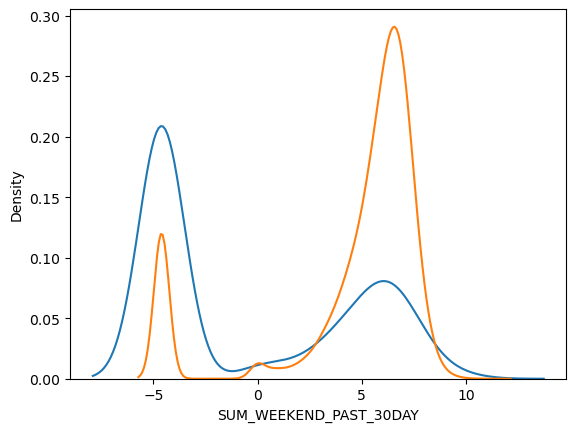

In [379]:
#sns.kdeplot((X["AMOUNT"] / (X["AVAIL_CRDT"]+0.01))[y==1])
#sns.kdeplot((X["AMOUNT"] / (X["AVAIL_CRDT"]+1))[y==1])
sns.kdeplot(np.log(X["SUM_WEEKEND_PAST_30DAY"][y==1]+0.01))
sns.kdeplot(np.log(X["SUM_WEEKEND_PAST_30DAY"][y==0]+0.01))


# Data Sampling

### Synthetic Minority Oversampling TEchniques (SMOTE)

### SMOTE-NC (Nominal Continuous)

### SMOTE-ENC (Encoded Nominal and Continuous)


In [295]:
xTrainDS, xTestDS, yTrainDS, yTestDS = train_test_split(xImportantColumns, y, test_size=0.2, stratify=y)

In [296]:
# sampling_strategy: num points in min / num points in maj (e.g. 0.8 --> 80% of num of maj classes = num of min points)
# For SMOTENC --> n_majority is AFTER resampling
# For RandomUnderSampler --> n_minority is AFTER resampling

# # the minority class will be sampled until you have 10% of the majority class
# over = SMOTE(sampling_strategy=0.1) 
over = SMOTENC(categorical_features=np.where(xTrainDS.dtypes == 'int64')[0], sampling_strategy=0.05, random_state=0)


xSMOTE, ySMOTE = over.fit_resample(xTrainDS, yTrainDS)
print(f"Original: \n{yTrainDS.value_counts()}")
print(f"New: \n{ySMOTE.value_counts()}")

Original: 
0    69661
1     1723
Name: FRAUD_FLAG, dtype: int64
New: 
0    69661
1     3483
Name: FRAUD_FLAG, dtype: int64


In [297]:
under = RandomUnderSampler(sampling_strategy=0.1)

xUnder, yUnder = under.fit_resample(xSMOTE, ySMOTE)
print(f"Original: \n{ySMOTE.value_counts()}")
print(f"New: \n{yUnder.value_counts()}")

Original: 
0    69661
1     3483
Name: FRAUD_FLAG, dtype: int64
New: 
0    34830
1     3483
Name: FRAUD_FLAG, dtype: int64


# Modeling Step

In [298]:
def evaluate(model, y_true, y_pred):
    # C_(i,j) = group i predicted to be in group j
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    percision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print(f"F1 Score: {f1:.4f}")
    print(f"Percision: {percision:.4f}")
    print(f"Recall: {recall:.4f}")
    # print(f"Confusion Matrix: \n {cm}")
    plt.figure(figsize=(4,4))
    plt.title('Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt='.5g')
    return model, cm, f1, percision, recall

In [299]:
def modeling(xTrain, xTest, yTrain, yTest, model):

    # Fit the model
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    
    # Evaluation
    model, cm, f1, percision, recall = evaluate(model, yTest, yPred)
    return model, cm, f1, percision, recall

In [300]:
# Normalize features to keep values in the same scale and improve accuracy/stabilize  models
def normalize(data, normalizerObject):
    """Normalize the data depending on the choice of normalizerObjecvt.

    Args:
        data (DataFrame): pandas DataFrame
        normalizerObject (sklearn type of normalizer): ex) StandardScaler

    Returns:
        DataFrame: normalized data
        Normalizer Object: fitted normalizer
    """
    sc = normalizerObject()
    xTrainNumericalNormalized = pd.DataFrame(sc.fit_transform(data), columns = data.columns)
    
    return xTrainNumericalNormalized, sc

In [301]:
numericalFeatures = xUnder.dtypes[xUnder.dtypes == 'float64'].index
binaryFeatures = xUnder.dtypes[xUnder.dtypes != 'float64'].index

xNumericalNormalized, sc = normalize(xUnder[numericalFeatures], StandardScaler)
xNormalized = pd.concat([xNumericalNormalized, xUnder[binaryFeatures]], axis=1)

In [302]:
xTestDSNormalized = pd.DataFrame(sc.transform(xTestDS[numericalFeatures]), columns=numericalFeatures)
xTestDSNormalized = pd.concat([xTestDSNormalized, xTestDS[binaryFeatures].reset_index()], axis=1)

In [303]:
xTestFinal, yTestFinal = xTestDSNormalized, yTestDS
xTestFinal = xTestFinal.drop(["index"], axis=1)

In [304]:
xFinal, yFinal = xNormalized, yUnder

# Logisitc Regression

F1 Score: 0.4550
Percision: 0.4032
Recall: 0.5220


/Users/michelleko/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


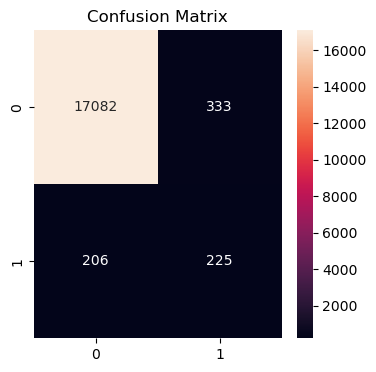

In [305]:
modelLR, cm, f1, percision, recall = modeling(xFinal, xTestFinal, yFinal, yTestFinal, LogisticRegression())


# XGBoost

F1 Score: 0.5317
Percision: 0.5031
Recall: 0.5638


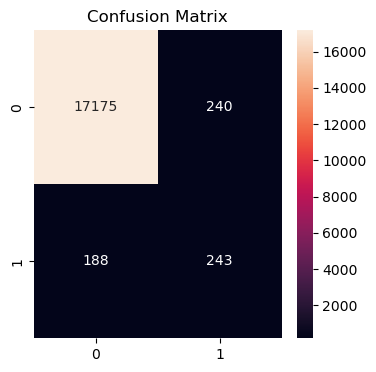

In [306]:
modelXGB, cm, f1, percision, recall = modeling(xFinal, xTestFinal, yFinal, yTestFinal, xgb.XGBClassifier())


In [ ]:
cm, f1, percision, recall

In [ ]:

plot_importance(modelXGB, importance_type="cover")

In [39]:
def CustomGridSearch(X, y, featureImportanceThresholds, max_delta_steps):
    xRF, _, yRF, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=0)
    rf = RandomForestClassifier()
    rf.fit(xRF, yRF)
    featureImportanceValues = rf.feature_importances_
        
    # Feature Selection stage
    for featureImportanceThreshold in featureImportanceThresholds:
        keepColumns = featureImportanceColumns[featureImportanceValues >= featureImportanceThreshold]
        xImportantColumns = X[keepColumns]
        
        # Data Sampling stage
        xTrainDS, xTestDS, yTrainDS, yTestDS = train_test_split(xImportantColumns, y, test_size=0.2, stratify=y)
        over = SMOTENC(categorical_features=np.where(xTrainDS.dtypes == 'int64')[0], sampling_strategy=0.1, random_state=0)
        xSMOTE, ySMOTE = over.fit_resample(xTrainDS, yTrainDS)
        under = RandomUnderSampler(sampling_strategy=0.3)
        xUnder, yUnder = under.fit_resample(xSMOTE, ySMOTE)
        
        # Normalizing stage
        numericalFeatures = xUnder.dtypes[xUnder.dtypes == 'float64'].index
        binaryFeatures = xUnder.dtypes[xUnder.dtypes != 'float64'].index
        xNumericalNormalized, sc = normalize(xUnder[numericalFeatures], StandardScaler)
        xNormalized = pd.concat([xNumericalNormalized, xUnder[binaryFeatures]], axis=1)

        xTestDSNormalized = pd.DataFrame(sc.transform(xTestDS[numericalFeatures]), columns=numericalFeatures)
        xTestDSNormalized = pd.concat([xTestDSNormalized, xTestDS[binaryFeatures].reset_index()], axis=1)
        xTestFinal, yTestFinal = xTestDSNormalized, yTestDS
        xTestFinal = xTestFinal.drop(["index"], axis=1)
        xFinal, yFinal = xNormalized, yUnder
        
        # Model Fitting stage
        for max_delta_step in max_delta_steps:
            print(f"Original: \n featureImportanceValue: {featureImportanceThreshold}, max_delta_step: {max_delta_step}")
            modelXGB, cm, f1, percision, recall = modeling(xFinal, xTestFinal, yFinal, yTestFinal, 
                                                           xgb.XGBClassifier(random_state=0, 
                                                                             max_delta_step=max_delta_step))
        

Original: 
 featureImportanceValue: 0.0, max_delta_step: 0
F1 Score: 0.6050
Percision: 0.5480
Recall: 0.6752
Original: 
 featureImportanceValue: 0.0, max_delta_step: 1
F1 Score: 0.5916
Percision: 0.5414
Recall: 0.6520
Original: 
 featureImportanceValue: 0.01, max_delta_step: 0
F1 Score: 0.4385
Percision: 0.3627
Recall: 0.5545
Original: 
 featureImportanceValue: 0.01, max_delta_step: 1
F1 Score: 0.4414
Percision: 0.3646
Recall: 0.5592


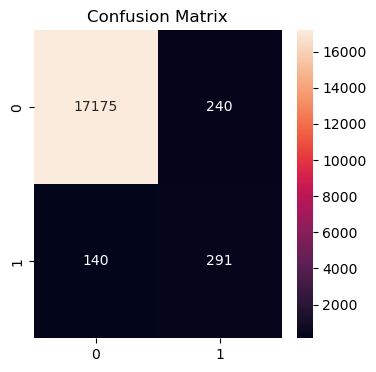

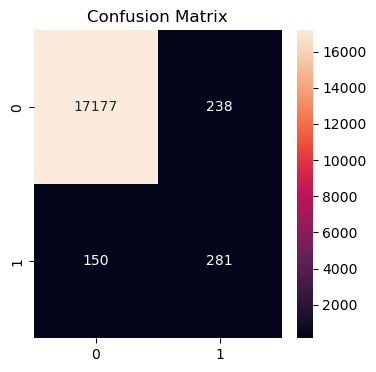

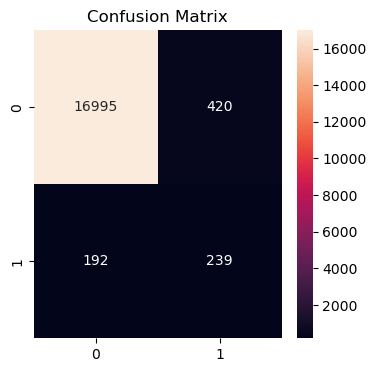

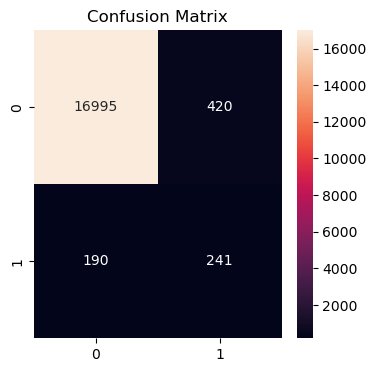

In [41]:
CustomGridSearch(X, y, [0.0, 0.01], [0,1])

# Post Analysis

<AxesSubplot:xlabel='FLAG_INTERNATIONAL', ylabel='Count'>

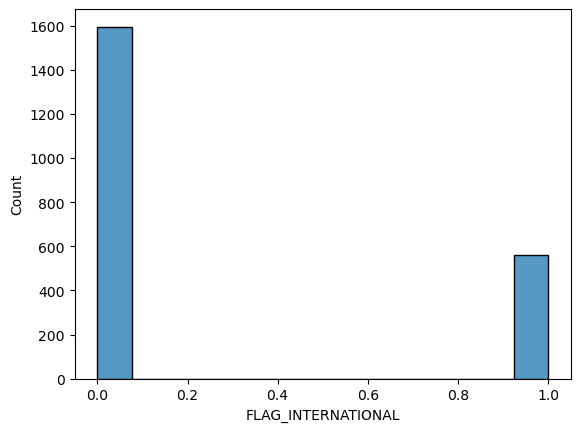

In [222]:
import seaborn as sns

sns.histplot(((X.loc[y==1])["FLAG_INTERNATIONAL"]))
#sns.histplot(((X.loc[y==0])["FLAG_INTERNATIONAL"]))

<AxesSubplot:xlabel='FRAUD_FLAG', ylabel='Density'>

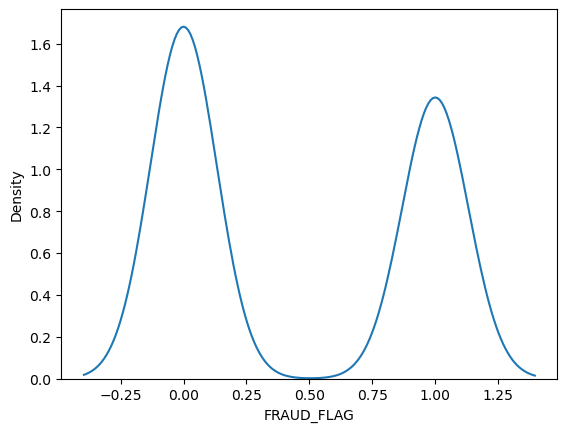

In [218]:
#sns.kdeplot(((y[X["FLAG_INTERNATIONAL"]==1])))
sns.kdeplot(((y[(X["FLAG_INTERNATIONAL"]==1) & (X["FLAG_INTERNET"]==1)])))

<AxesSubplot:xlabel='MEAN_INTERNATIONAL_PAST_7DAY', ylabel='Density'>

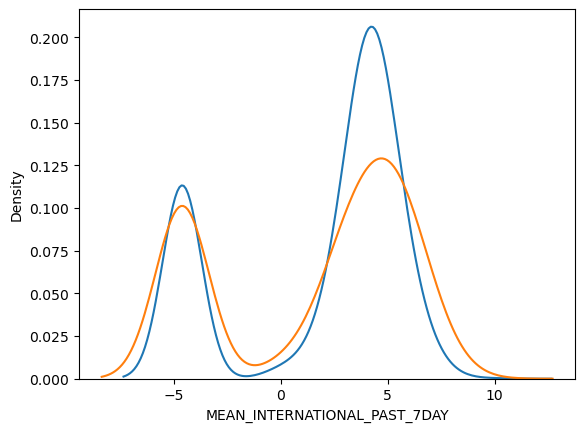

In [299]:
sns.kdeplot(np.log(X["MEAN_INTERNATIONAL_PAST_7DAY"][(y==0)&(X["FLAG_INTERNATIONAL"]==1)] + 0.01))
sns.kdeplot(np.log(X["MEAN_INTERNATIONAL_PAST_7DAY"][(y==1)&(X["FLAG_INTERNATIONAL"]==1)] + 0.01))

In [215]:
y[(X["FLAG_INTERNATIONAL"]==1) & (X["FLAG_INTERNET"]==1)]

24       1
343      1
420      0
495      1
720      0
        ..
87796    0
88047    0
88787    1
89039    1
89218    1
Name: FRAUD_FLAG, Length: 761, dtype: int64

(array([85447.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1629.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

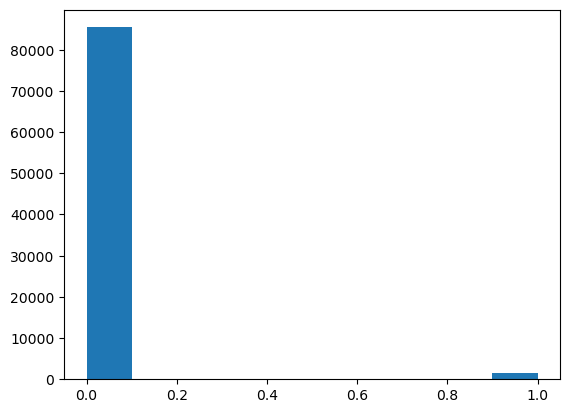

In [186]:
plt.hist((X.loc[y==0])["FLAG_INTERNATIONAL"])


In [253]:
X[(X["FLAG_INTERNATIONAL"]==1)&(X["FLAG_INTERNET"]==1)].iloc[:,15:35]

,FLAG_FASTFOOD,FLAG_GAS,FLAG_HIGH_AMT,FLAG_HIGH_RECREA,FLAG_INTERNET,FLAG_INTERNATIONAL,FLAG_JEWELRY,FLAG_LOW_AMT,FLAG_MANUAL_ENTRY,FLAG_PHONE_ORDER,FLAG_PURCHASE_EXCLUDING_GAS,FLAG_PLANNED,FLAG_RISKY,FLAG_SWIPE,FLAG_TRAVEL_ONLY,FLAG_TRAVEL_AND_ENTERTAINMENT,FLAG_WEEKEND,MEAN_AUTO_PAST_7DAY,MEAN_LS_PAST_7DAY,MEAN_RECREA_PAST_7DAY
24,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0.00,1596.61,344.60
343,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0.00,97.50,53.14
420,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,73.29,23.32,6.83
495,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0.00,0.00,0.00
720,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0.00,435.11,413.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87796,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,2.81,36.03,27.39
88047,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,1,0.00,0.00,0.00
88787,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0.00,0.00,0.00
89039,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0.00,0.00,0.00
